In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import(
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor
)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from math import sqrt


In [2]:
!pip install xgboost

In [3]:
df1=pd.read_csv(r"C:\Users\riyaz\Downloads\Rossmann Stores Data.csv")

C:\Users\riyaz\anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df2=pd.read_csv(r"C:\Users\riyaz\Downloads\store.csv")

In [5]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
df3=pd.concat([df1,df2],axis=1)

In [8]:
df3.head().to_csv('ros.csv')

In [9]:
df3.to_csv('file10.csv')

In [10]:
df3.shape

(1017209, 19)

In [11]:
df3 = df3.loc[:, ~df3.columns.duplicated()]

In [12]:
df3.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0.0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1.0,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1.0,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0.0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0.0,NaN,NaN,NaN


In [13]:
df3['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [14]:
#Total avg. sales


# Top 5 of (Avg. sales per day per store)


# Avg. sales per day per store type
#Avg. sales on SchoolHoliday


#Avg. sales on StateHoliday
#  For the top 5 stores - comparison between avg. sales vs. avg. sales on StateHoliday vs avg. sales on SchoolHolidays(stacked bar chart)

In [15]:
df2.Assortment.value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

In [16]:
# Check assortment sales for a and b
#More the no of customer footfall higher the sales...verify ...line graph ...footfall and sales

In [17]:
df3['CompetitionOpenSinceYear'].dtype

dtype('float64')

# Know your data

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1115 non-null     object 
 10  Assortment                 1115 non-null     object 
 11  CompetitionDistance        1112 non-null     float64
 12  CompetitionOpenSinceMonth  761 non-null      float64
 13  CompetitionO

In [19]:
df3.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [20]:
df3.isnull().sum()

Store                              0
DayOfWeek                          0
Date                               0
Sales                              0
Customers                          0
Open                               0
Promo                              0
StateHoliday                       0
SchoolHoliday                      0
StoreType                    1016094
Assortment                   1016094
CompetitionDistance          1016097
CompetitionOpenSinceMonth    1016448
CompetitionOpenSinceYear     1016448
Promo2                       1016094
Promo2SinceWeek              1016638
Promo2SinceYear              1016638
PromoInterval                1016638
dtype: int64

In [21]:
df3[df3.duplicated()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


# Plotting value counts of columns

Text(0.5, 1.0, 'Counts of store types')

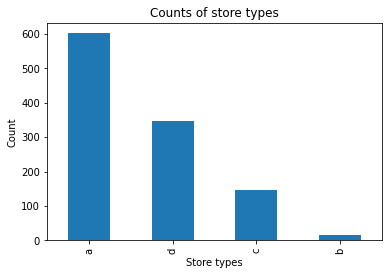

In [22]:
df3['StoreType'].value_counts().plot(kind='bar')
plt.xlabel('Store types')
plt.ylabel('Count')
plt.title('Counts of store types')

# Checking normality of missing value columns

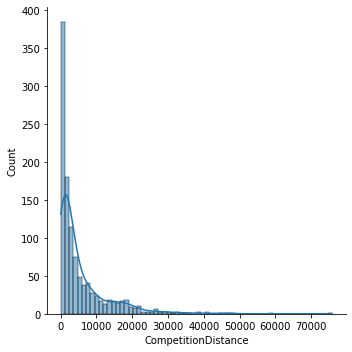

In [23]:

sns.displot(df3['CompetitionDistance'], kde=True)

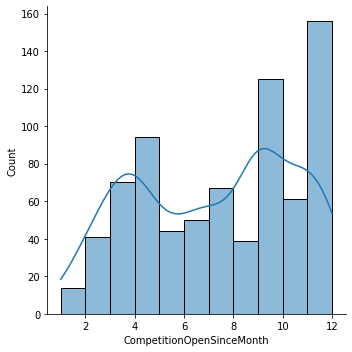

In [24]:
sns.displot(df3['CompetitionOpenSinceMonth'], kde=True)

C:\Users\riyaz\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CompetitionOpenSinceYear'>

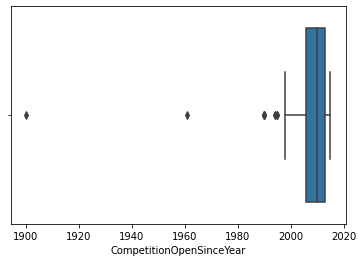

In [25]:
sns.boxplot(df3['CompetitionOpenSinceYear'])

<AxesSubplot:xlabel='Promo2SinceWeek', ylabel='Count'>

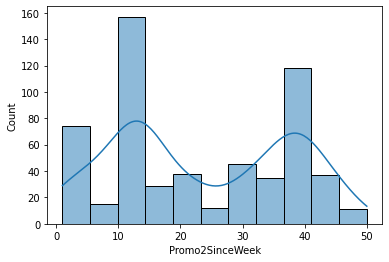

In [26]:
sns.histplot(df3['Promo2SinceWeek'],kde=True)

C:\Users\riyaz\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Promo2SinceYear'>

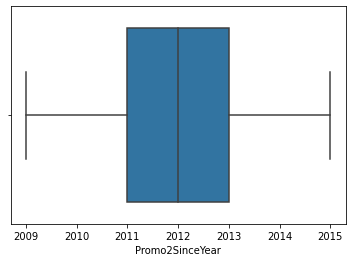

In [27]:
sns.boxplot(df3['Promo2SinceYear'])

<AxesSubplot:xlabel='PromoInterval', ylabel='Count'>

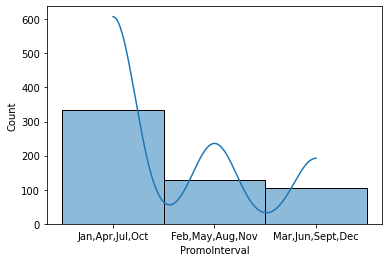

In [28]:
sns.histplot(df3['PromoInterval'],kde=True)

# Handling missing values

In [29]:
 #df3['CompetitionDistance']=df3['CompetitionDistance'].fillna(df3['CompetitionDistance'].median(),inplace=True)

In [30]:
#df3['CompetitionOpenSinceMonth']=df3['CompetitionOpenSinceMonth'].fillna(df3['CompetitionOpenSinceMonth'].median(),inplace=True)

In [31]:
#df3['CompetitionOpenSinceYear']=df3['CompetitionOpenSinceYear'].fillna(df3['CompetitionOpenSinceYear'].median(),inplace=True)

In [32]:
#df3['Promo2SinceWeek']=df3['Promo2SinceWeek'].fillna(df3['Promo2SinceWeek'].median(),inplace=True)

In [33]:
#df3['Promo2SinceYear']=df3['Promo2SinceYear'].fillna(df3['Promo2SinceYear'].median(),inplace=True)


In [34]:
#df3['PromoInterval']=df3['PromoInterval'].fillna(df3['PromoInterval'].mode(),inplace=True)

In [35]:
df3.fillna(df3.median(),inplace=True)

In [36]:
df3.isnull().sum()

Store                              0
DayOfWeek                          0
Date                               0
Sales                              0
Customers                          0
Open                               0
Promo                              0
StateHoliday                       0
SchoolHoliday                      0
StoreType                    1016094
Assortment                   1016094
CompetitionDistance                0
CompetitionOpenSinceMonth          0
CompetitionOpenSinceYear           0
Promo2                             0
Promo2SinceWeek                    0
Promo2SinceYear                    0
PromoInterval                1016638
dtype: int64

### Cleaning the data

In [37]:
df3['Assortment'].mode()

0    a
dtype: object

In [38]:
df3['StateHoliday'].loc[df3['StateHoliday']==0]='0'

In [39]:
df3['Assortment'] = df3['Assortment'].fillna(df3['Assortment'].mode().iloc[0])


In [40]:
df3['StoreType'].mode()

0    a
dtype: object

In [41]:
df3['StoreType']=df3['StoreType'].fillna(df3['StoreType'].mode().iloc[0])

In [42]:
df3['PromoInterval']=df3['PromoInterval'].fillna(df3['PromoInterval'].mode().iloc[0])

In [43]:
df3['PromoInterval'].isnull().sum()

0

In [44]:
df3['Promo2SinceYear'].unique()

array([2012., 2010., 2011., 2009., 2014., 2015., 2013.])

In [45]:
#df3['Promo2SinceYear']= pd.to_datetime(df3['Promo2SinceYear'], format='%Y')

In [46]:
df3['Promo2SinceYear']=df3['Promo2SinceYear'].astype(int)

In [47]:
df3['CompetitionOpenSinceMonth']=df3['CompetitionOpenSinceMonth'].astype(int)

In [48]:
df3['Promo2']=df3['Promo2'].astype(int)

In [49]:
df3['Promo2SinceWeek']=df3['Promo2SinceWeek'].astype(int)

In [50]:
df3['Promo2SinceWeek']=df3['Promo2SinceWeek'].astype(int)

In [51]:
df3['PromoInterval']

0          Jan,Apr,Jul,Oct
1          Jan,Apr,Jul,Oct
2          Jan,Apr,Jul,Oct
3          Jan,Apr,Jul,Oct
4          Jan,Apr,Jul,Oct
                ...       
1017204    Jan,Apr,Jul,Oct
1017205    Jan,Apr,Jul,Oct
1017206    Jan,Apr,Jul,Oct
1017207    Jan,Apr,Jul,Oct
1017208    Jan,Apr,Jul,Oct
Name: PromoInterval, Length: 1017209, dtype: object

In [52]:
#df3['PromoInterval'].replace({'Jan,Apr,Jul,Oct':0,'Feb,May,Aug,Nov':1,'Mar,Jun,Sept,Dec':2},inplace=True)

In [53]:
df3['PromoInterval'].unique()

array(['Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [54]:
#df3['PromoInterval']= df3['PromoInterval'].str.split(',').str[0]

In [55]:
df3['PromoInterval'].unique()

array(['Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [56]:
print(df3['PromoInterval'])

0          Jan,Apr,Jul,Oct
1          Jan,Apr,Jul,Oct
2          Jan,Apr,Jul,Oct
3          Jan,Apr,Jul,Oct
4          Jan,Apr,Jul,Oct
                ...       
1017204    Jan,Apr,Jul,Oct
1017205    Jan,Apr,Jul,Oct
1017206    Jan,Apr,Jul,Oct
1017207    Jan,Apr,Jul,Oct
1017208    Jan,Apr,Jul,Oct
Name: PromoInterval, Length: 1017209, dtype: object


In [57]:
#df3['PromoInterval']= df3['PromoInterval'].str.split(',').str[1]

In [58]:
df3['PromoInterval'].unique()

array(['Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [59]:
replace_dict ={'Jan,Apr,Jul,Oct': 0, 'Feb,May,Aug,Nov': 1, 'Mar,Jun,Sept,Dec': 2}

In [60]:
df3['PromoInterval']=df3['PromoInterval'].map(replace_dict)

In [61]:
df3['PromoInterval'].isnull().sum()

0

In [62]:
df3['PromoInterval']

0          0
1          0
2          0
3          0
4          0
          ..
1017204    0
1017205    0
1017206    0
1017207    0
1017208    0
Name: PromoInterval, Length: 1017209, dtype: int64

In [63]:
from datetime import datetime

In [64]:
df3['DayOfWeek']

0          5
1          5
2          5
3          5
4          5
          ..
1017204    2
1017205    2
1017206    2
1017207    2
1017208    2
Name: DayOfWeek, Length: 1017209, dtype: int64

In [65]:
day_of_week_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

In [66]:
df3['weekday'] = df3['DayOfWeek'].map(day_of_week_mapping)

In [67]:
df3['weekday']

0           Saturday
1           Saturday
2           Saturday
3           Saturday
4           Saturday
             ...    
1017204    Wednesday
1017205    Wednesday
1017206    Wednesday
1017207    Wednesday
1017208    Wednesday
Name: weekday, Length: 1017209, dtype: object

In [68]:
Avg_sales_store=df3.groupby('Store')['Sales'].mean()

In [69]:
avg_sales_store_day=df3.groupby(['Store', 'weekday'])['Sales'].mean()

In [70]:

avg_sales_store_day



Store  weekday  
1      Friday       4094.607407
       Saturday     4516.414815
       Sunday       4942.970149
       Thursday     4454.474074
       Tuesday      4946.119403
                       ...     
1115   Saturday     6208.881481
       Sunday       6773.388060
       Thursday     5666.155556
       Tuesday      6704.223881
       Wednesday    5811.533333
Name: Sales, Length: 6690, dtype: float64

In [71]:
top5_str_sls_day=df3.groupby(['Store', 'weekday'])['Sales'].mean().nlargest(n=5)
top5_str_sls_day
# Top 5 of (Avg. sales per day per store)

Store  weekday  
817    Tuesday      24186.365672
       Wednesday    23469.207407
       Thursday     22187.000000
1114   Sunday       21935.500000
817    Friday       21302.755556
Name: Sales, dtype: float64

In [72]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  int32  
 13  CompetitionO

In [73]:
# Avg. sales per day per store type
top5_Avg_sal_day_str_type=df3.groupby(['StoreType', 'weekday'])['Sales'].mean().nlargest(n=5)
top5_Avg_sal_day_str_type

StoreType  weekday  
b          Saturday     12677.764706
c          Saturday      9109.317568
d          Saturday      9096.795977
a          Tuesday       7809.044510
           Wednesday     7005.244467
Name: Sales, dtype: float64

In [74]:
#Avg. sales on SchoolHoliday


In [75]:
Avg_sal_stateHoliday=df3.groupby('StateHoliday')['Sales'].mean()
Avg_sal_stateHoliday

StateHoliday
0    5947.483893
a     290.735686
b     214.311510
c     168.733171
Name: Sales, dtype: float64

In [76]:
df3['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [77]:
school_holidays=df3[df3['SchoolHoliday']==1]

In [78]:
Avg_sal_schoolHolidays=school_holidays['Sales'].mean()

In [79]:
Avg_sal_schoolHolidays

6476.522207119706

In [80]:
state_holidays=df3[df3['StateHoliday']==1]

In [81]:
Avg_sal_stateHolidays=state_holidays['Sales'].mean()
Avg_sal_stateHolidays

nan

In [82]:
#plot Avg_sal_schoolHolidays,Avg_sal_stateHolidays,top5_str_sls_day

In [83]:
df3['Promo2SinceYear'].unique()

array([2012, 2010, 2011, 2009, 2014, 2015, 2013])

In [84]:
df3['StateHoliday'].mode()

0    0
dtype: object

In [85]:
#Feature engineering 
#onenhot encoding of promointerval
#Promo 2 since week one hot encoding
#'Promo2SinceYear' one hot encoding
#Competition open since week/year one hot encoding
#Store type assortmeent one hot encoding
#Scaling of data rpmo2sinceweek 52nweeksw scaled b/w o and 1

# Feature Engineering

In [86]:
df3['StoreType']=pd.get_dummies(df3['StoreType'])

In [87]:
df3['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [88]:
df3['StateHoliday']=pd.get_dummies(df3['StateHoliday'])

In [89]:
df3.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekday
0,1,5,2015-07-31,5263,555,1,1,1,1,0,a,1270.0,9,2008.0,0,22,2012,0,Saturday
1,2,5,2015-07-31,6064,625,1,1,1,1,1,a,570.0,11,2007.0,1,13,2010,0,Saturday
2,3,5,2015-07-31,8314,821,1,1,1,1,1,a,14130.0,12,2006.0,1,14,2011,0,Saturday
3,4,5,2015-07-31,13995,1498,1,1,1,1,0,c,620.0,9,2009.0,0,22,2012,0,Saturday
4,5,5,2015-07-31,4822,559,1,1,1,1,1,a,29910.0,4,2015.0,0,22,2012,0,Saturday


In [90]:
df3['Assortment']=pd.get_dummies(df3['Assortment'])

In [91]:
df3['StateHoliday']=pd.get_dummies(df3['StateHoliday'])

In [92]:
df3.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekday
0,1,5,2015-07-31,5263,555,1,1,0,1,0,1,1270.0,9,2008.0,0,22,2012,0,Saturday
1,2,5,2015-07-31,6064,625,1,1,0,1,1,1,570.0,11,2007.0,1,13,2010,0,Saturday
2,3,5,2015-07-31,8314,821,1,1,0,1,1,1,14130.0,12,2006.0,1,14,2011,0,Saturday
3,4,5,2015-07-31,13995,1498,1,1,0,1,0,0,620.0,9,2009.0,0,22,2012,0,Saturday
4,5,5,2015-07-31,4822,559,1,1,0,1,1,1,29910.0,4,2015.0,0,22,2012,0,Saturday


In [93]:
from datetime import datetime

In [94]:
df3['Date'] = pd.to_datetime(df3['Date'])

In [95]:
df3['year'] = df3['Date'].dt.year
df3['month'] = df3['Date'].dt.month
df3['day'] = df3['Date'].dt.day



In [96]:
df3.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekday,year,month,day
0,1,5,2015-07-31,5263,555,1,1,0,1,0,...,9,2008.0,0,22,2012,0,Saturday,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,1,...,11,2007.0,1,13,2010,0,Saturday,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,1,...,12,2006.0,1,14,2011,0,Saturday,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,0,...,9,2009.0,0,22,2012,0,Saturday,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,1,...,4,2015.0,0,22,2012,0,Saturday,2015,7,31


In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler = MinMaxScaler()

In [99]:
df3[['Scaled_Promo2SinceWeek']]=scaler.fit_transform(df3[['Promo2SinceWeek']])

In [100]:
df3[['Scaled_CompetitionDistance']]=scaler.fit_transform(df3[['CompetitionDistance']])

In [101]:
df3[['Scaled_Customers']]=scaler.fit_transform(df3[['Customers']])

In [102]:
df3.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekday,year,month,day,Scaled_Promo2SinceWeek,Scaled_CompetitionDistance,Scaled_Customers
0,1,5,2015-07-31,5263,555,1,1,0,1,0,...,22,2012,0,Saturday,2015,7,31,0.428571,0.016482,0.075122
1,2,5,2015-07-31,6064,625,1,1,0,1,1,...,13,2010,0,Saturday,2015,7,31,0.244898,0.007252,0.084597
2,3,5,2015-07-31,8314,821,1,1,0,1,1,...,14,2011,0,Saturday,2015,7,31,0.265306,0.186050,0.111126
3,4,5,2015-07-31,13995,1498,1,1,0,1,0,...,22,2012,0,Saturday,2015,7,31,0.428571,0.007911,0.202761
4,5,5,2015-07-31,4822,559,1,1,0,1,1,...,22,2012,0,Saturday,2015,7,31,0.428571,0.394119,0.075663


In [103]:
df3.drop(columns=['Store','Date','Customers','Promo2SinceWeek','weekday'],axis=1,inplace=True)

<AxesSubplot:>

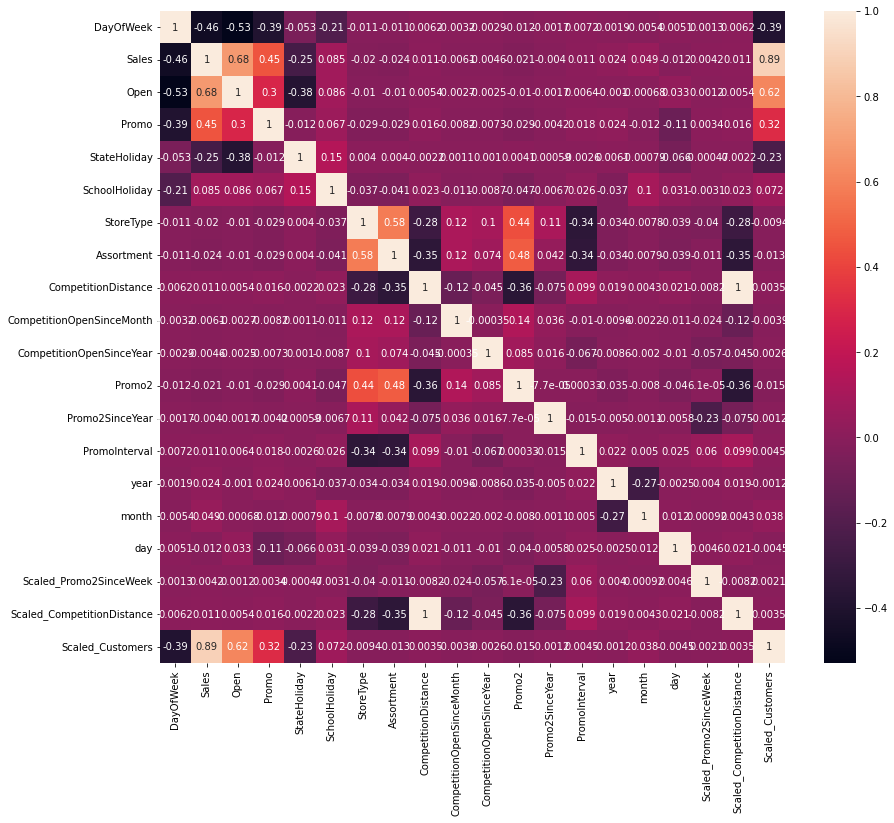

In [104]:
plt.figure(figsize=(14,12))
sns.heatmap(df3.corr(),annot=True)

In [105]:
X=df3.drop('Sales',axis=1)


In [106]:
y=df3['Sales']

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=1)

In [108]:
X_train.shape

(813767, 19)

In [109]:
y_train.shape

(813767,)

In [110]:
X_test.shape

(203442, 19)

In [111]:
y_test.shape

(203442,)

In [112]:
#Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
                "Random Forest": RandomForestRegressor(),
                "Decision Tree": DecisionTreeRegressor(),
                "Gradient Boosting": GradientBoostingRegressor(),
                "Linear Regression": LinearRegression(),
                "XGBRegressor": XGBRegressor(),
                "AdaBoost Regressor": AdaBoostRegressor()
            }
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')